### Time Series Decomposition
- The main reason for decomposing time series data is  
  to understand the complex structure of the data and facilitate prediction or analysis.
- Specifically, the purpose is to check long-term trends in data,  
  analyze periodic patterns such as daily, weekly, monthly, and yearly patterns,  
  or detect outliers by analyzing residuals remaining after separating trends or seasonality.
- Time series data is decomposed into three main components:  
  1. Trend  
     Indicates long-term changes in data.
  2. Seasonal  
     Indicates fluctuations in the data with a certain period.
  3. Residual  
     It represents the noise or volatility  
     remaining after removing the Trend and Seasonal components.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.float_format', '{:.2f}'.format)

### Read file
- The data to be worked on is downsampled from the raw data on a weekly basis.
- raw data name : Corn, Oat, Cereals & Grains Futures Data    
  (Historical data on Cereals and Grains Futures from Yahoo Finance)
- raw data source : kaggle datasets  
  (https://www.kaggle.com/datasets/guillemservera/grains-and-cereals-futures)

In [3]:
df = pd.read_csv('./data/grain_prices/all_grains_data_week_2.csv',
                sep=',', encoding='utf-8')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7194 entries, 0 to 7193
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   commodity       7194 non-null   object 
 1   week_last_date  7194 non-null   object 
 2   open            7194 non-null   float64
 3   high            7194 non-null   float64
 4   low             7194 non-null   float64
 5   close           7194 non-null   float64
 6   volume          7194 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 393.5+ KB


In [5]:
df['week_last_date'] = pd.to_datetime(df['week_last_date'])

### Classic way
- Classic decomposition methods include additive model and multiplicative moel.
- The additive model assumes that each component that makes up time series data is connected through addition,    
  and the multiplicative model assumes that each component is connected through multiplication.
- Model selection can be done by considering the characteristics of time series data.  
  When data fluctuations over time are constant, using an additive model is appropriate.  
  Conversely, if the variation varies proportionally with the level of observations,
  it is better to apply a multiplicative model.
- Problems with the classic decomposition method :
  In reality, seasonality also changes depending on temporal changes,  
  but the classical method assumes that seasonality continues to repeat.  
  It can be difficult to achieve the desired results with complex data or data with nonlinear trends.

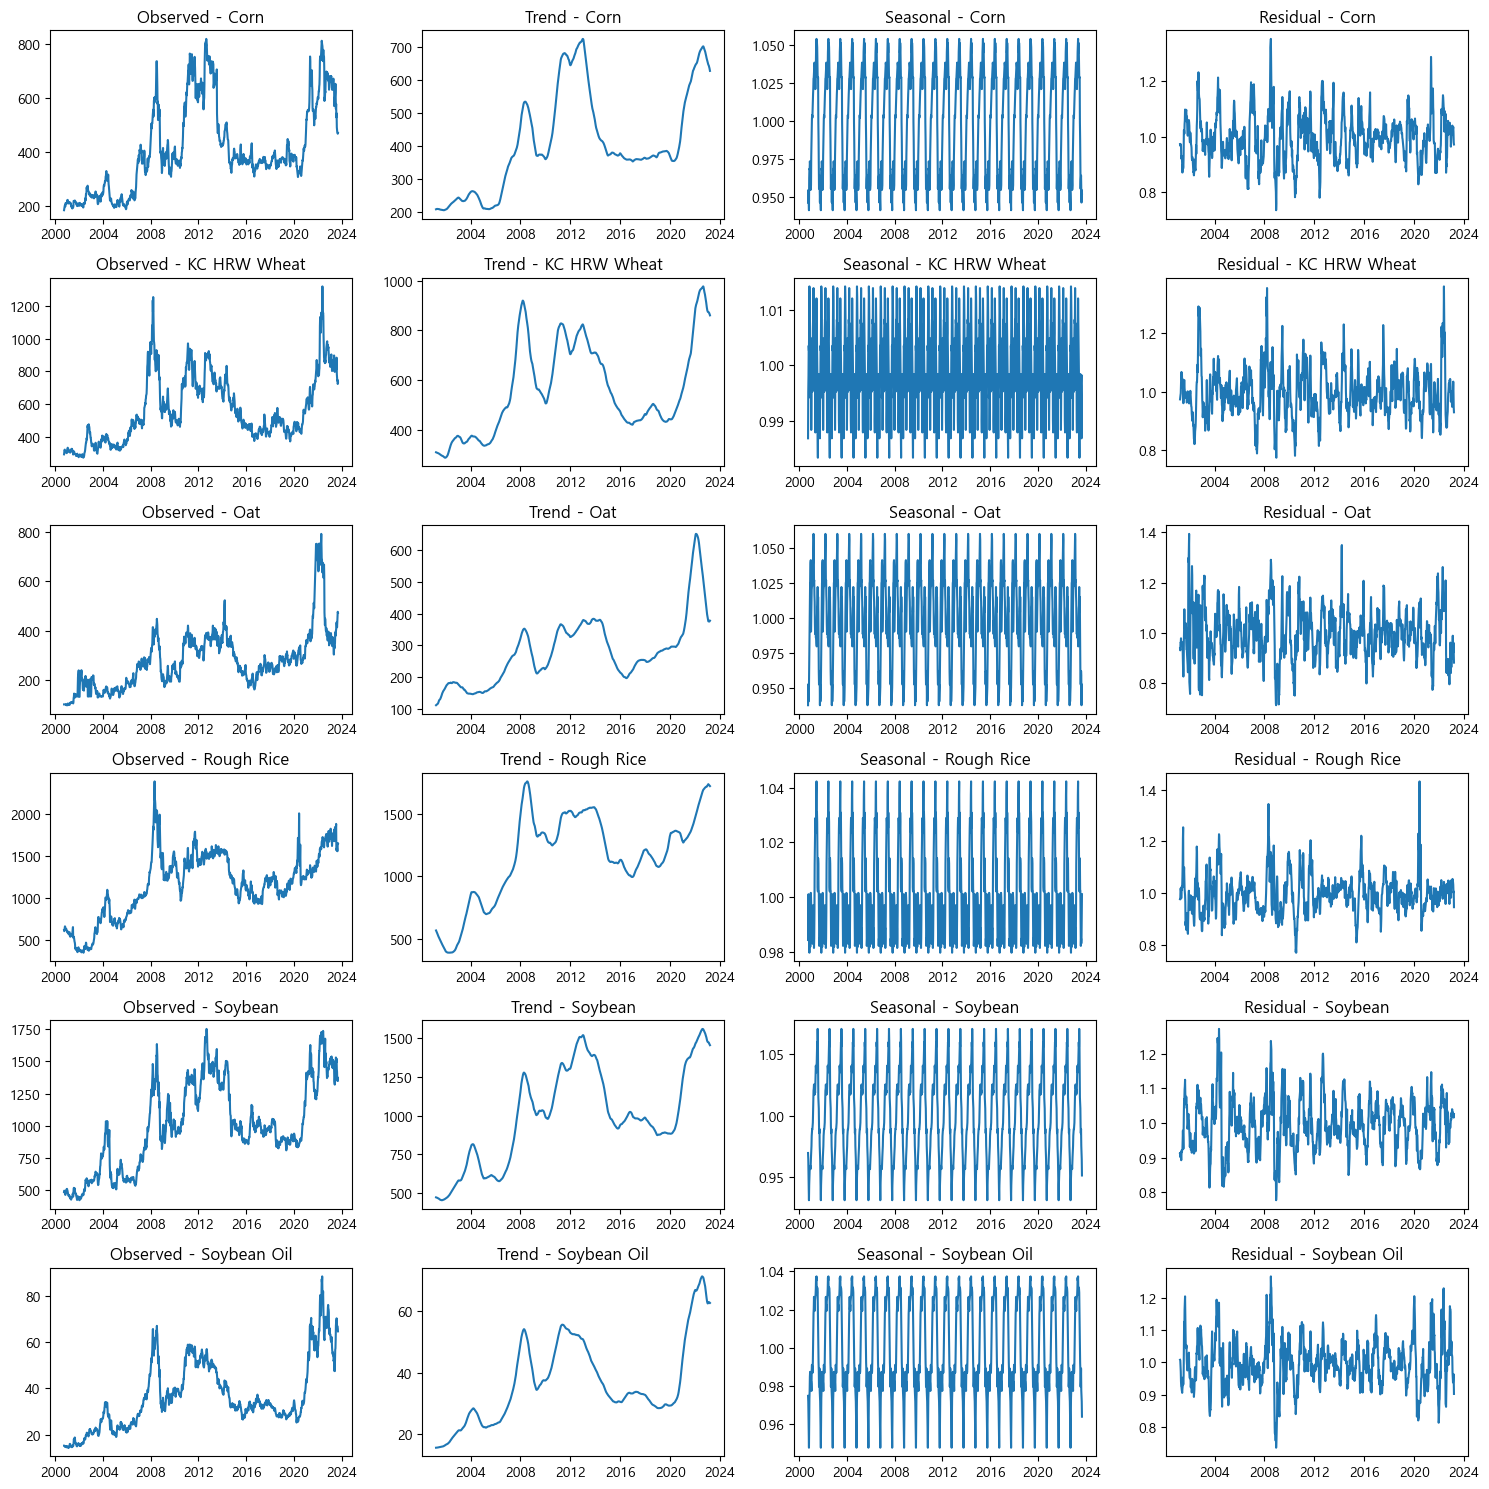

In [7]:
commodities = df['commodity'].unique()

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))  

for i, commodity in enumerate(commodities):
    commodity_df = df[df['commodity'] == commodity].set_index('week_last_date')
    result = seasonal_decompose(commodity_df['close'], model='multiplicative', period=52)
    
    axes[i, 0].plot(result.observed)
    axes[i, 0].set_title(f'Observed - {commodity}')
    
    axes[i, 1].plot(result.trend)
    axes[i, 1].set_title(f'Trend - {commodity}')
    
    axes[i, 2].plot(result.seasonal)
    axes[i, 2].set_title(f'Seasonal - {commodity}')
    
    axes[i, 3].plot(result.resid)
    axes[i, 3].set_title(f'Residual - {commodity}')

plt.tight_layout()
plt.show()

### STL method
- "STL" decomposes time series using locally estimated scatterplot smoothing(LOESS).
- This method is more flexible than the classic time series decomposition method,  
  It is particularly well suited to nonlinear data or data with fluctuating seasonality.
- The flexibility of STL can be adjusted through various factors:  
  1. seasonal: Specifies the smoothing window size for the seasonal component.  
     Larger values result in smoother seasonality.  
     Typically, odd values of the seasonal cycle are used.
  2. seasonal_deg: Degree of the LOESS polynomial for the seasonal part.  
     The default is 1, which is linear.  
  3. trend: Specifies the smoothing window size for the trend component.  
     Larger values result in smoother trends.
     The default value for this parameter is None,  
     which will cause it to choose an appropriate value internally.   
  5. trend_deg: Degree of the LOESS polynomial for the trend portion.  
     The default is 1.
  6. low_pass: Specifies the low-frequency smoothing window size for the trend component.  
     This is used to remove high-frequency noise from the time series.  
     The default is 13.
  8. low_pass_deg: Degree of the LOESS polynomial for the low-pass filter part.  
     The default is 1.
  9. robust: If this argument is set to True, a robust STL is performed that is resistant to some outliers.

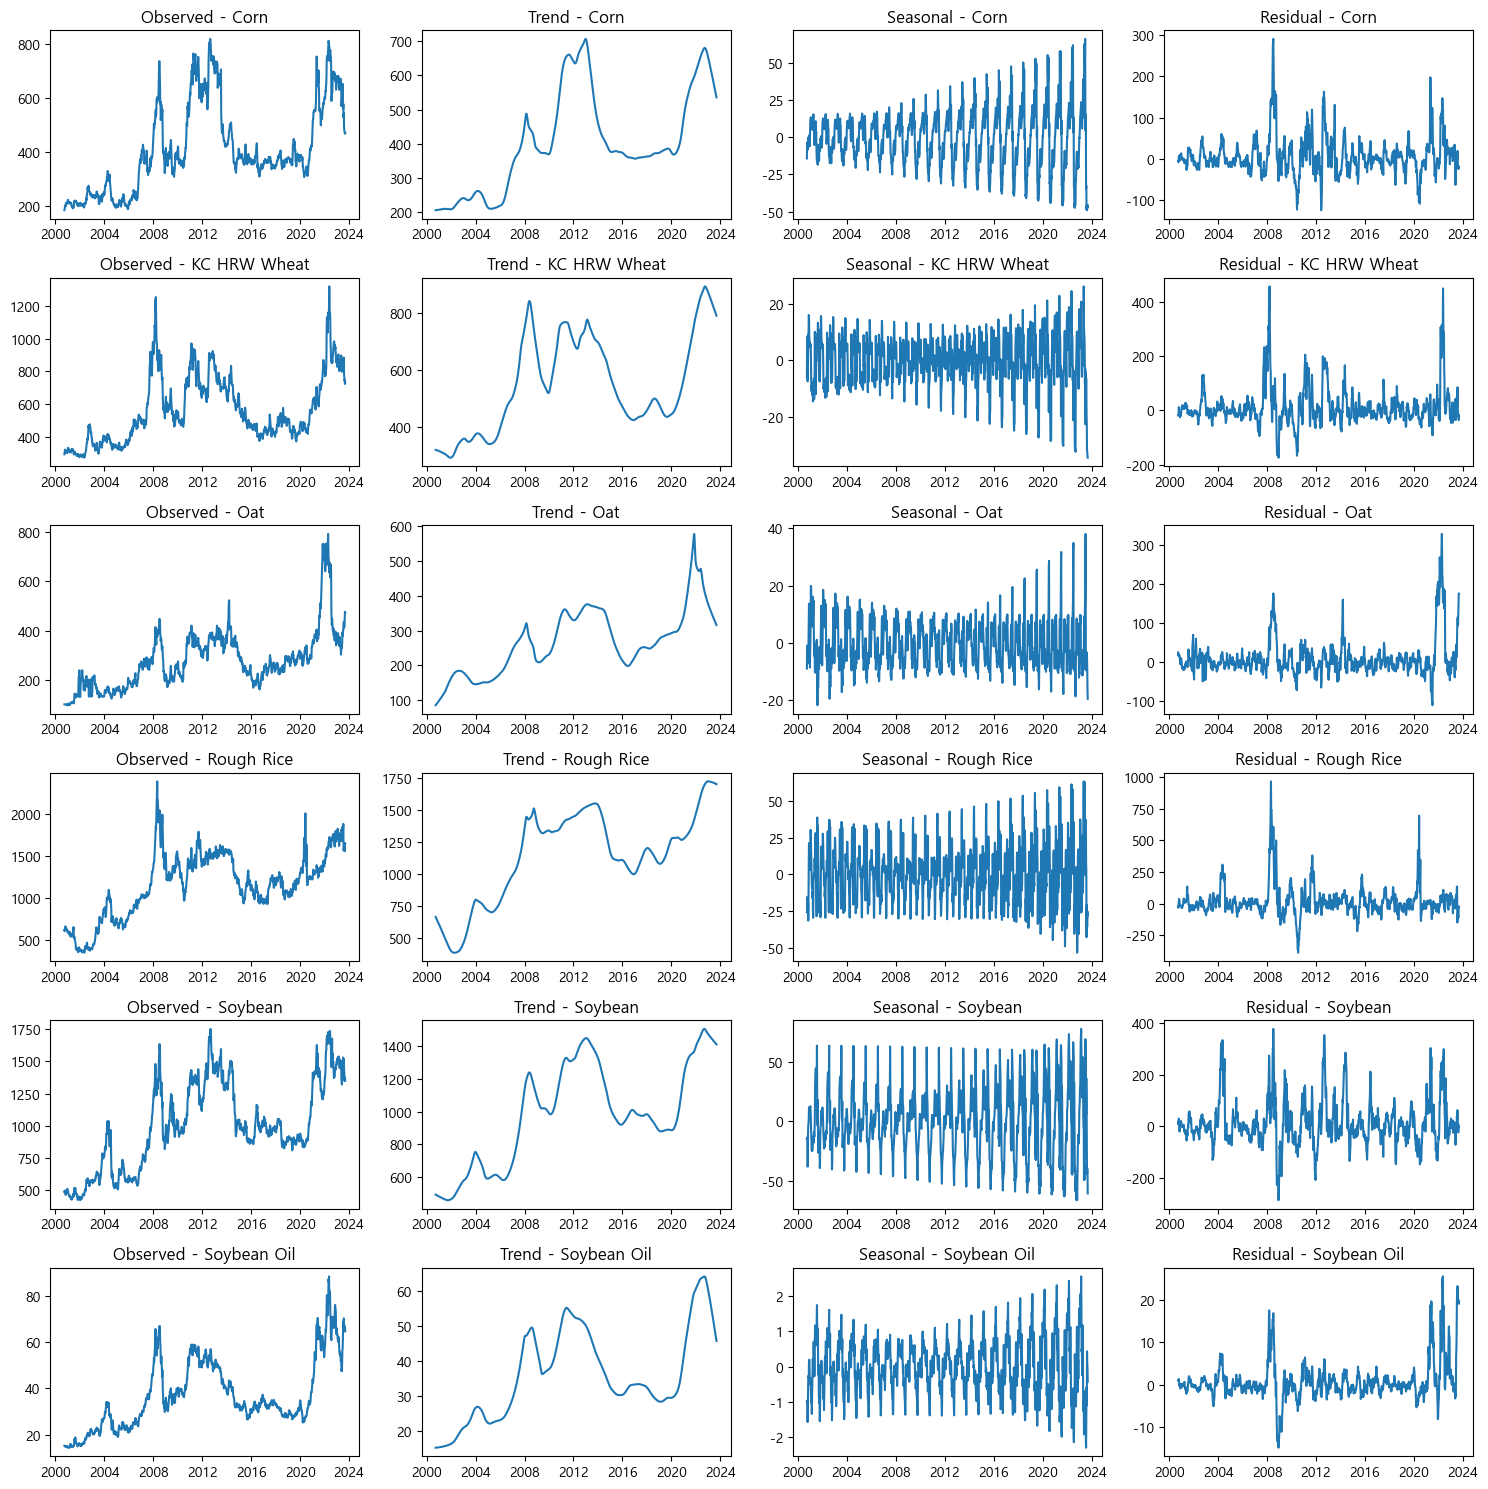

In [14]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 15))

for i, commodity in enumerate(commodities):
    commodity_df = df[df['commodity'] == commodity].set_index('week_last_date')
    stl = STL(commodity_df['close'], 
              seasonal=53,                
              seasonal_deg=3,
              trend_deg=3,                 
              low_pass_deg=2,              
              robust=True
             )
    result = stl.fit()
    
    axes[i, 0].plot(result.observed)
    axes[i, 0].set_title(f'Observed - {commodity}')
    
    axes[i, 1].plot(result.trend)
    axes[i, 1].set_title(f'Trend - {commodity}')
    
    axes[i, 2].plot(result.seasonal)
    axes[i, 2].set_title(f'Seasonal - {commodity}')
    
    axes[i, 3].plot(result.resid)
    axes[i, 3].set_title(f'Residual - {commodity}')

plt.tight_layout()
plt.show()

- As a result of performing time series decompositon in two ways,  
  the trend has a smoothed appearance compared to the actual observation data,  
  and can be seen as an upward trend in the long term.
- However, both actual observation data and trends have complex nonlinear patterns  
  that make it difficult to clearly determine trends.
- These complex patterns are not due to seasonality or noise,  
  but appear to be a structural feature of the data itself.
- When time series data has a very complex non-linear pattern like this,
  in order to predict the future,  
  It may be more appropriate to use machine learning/deep learning prediction models  
  rather than traditional statistical prediction models.